# Supermarket Sales Prediction

About Dataset

Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information
Invoice id: Computer generated sales slip invoice identification number.

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters.

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer.

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

Unit price: Price of each product in $.

Quantity: Number of products purchased by customer.

Tax: 5% tax fee for customer buying.

Total: Total price including tax.

Date: Date of purchase (Record available from January 2019 to March 2019).

Time: Purchase time (10am to 9pm).

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).

COGS: Cost of goods sold.

Gross margin percentage: Gross margin percentage.

Gross income: Gross income.

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

In [1]:
### importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/vachan/supermarket.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Few observations: 1.The Total has outliers. 2.The Tax 5% has outliers. 3.The gross income has outliers.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

 There is no null values.

In [6]:
# select all object type columns
cat_cols=df.select_dtypes(include = 'object').columns.to_list()
cat_cols

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [7]:
#Exploring the object type columns
for col in cat_cols:
    print("Unique Value count : ", col, '\n')
    print('Count: ', len(df[col].unique()),'\n\n')

Unique Value count :  Invoice ID 

Count:  1000 


Unique Value count :  Branch 

Count:  3 


Unique Value count :  City 

Count:  3 


Unique Value count :  Customer type 

Count:  2 


Unique Value count :  Gender 

Count:  2 


Unique Value count :  Product line 

Count:  6 


Unique Value count :  Date 

Count:  89 


Unique Value count :  Time 

Count:  506 


Unique Value count :  Payment 

Count:  3 




In [8]:
## Checking the value counts of Categorical Columns
## Exploring Object Type Columns
for col in cat_cols[1:]:
    print("Value count : ", col, '\n')
    print(df[col].value_counts(),'\n\n')

Value count :  Branch 

A    340
B    332
C    328
Name: Branch, dtype: int64 


Value count :  City 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 


Value count :  Customer type 

Member    501
Normal    499
Name: Customer type, dtype: int64 


Value count :  Gender 

Female    501
Male      499
Name: Gender, dtype: int64 


Value count :  Product line 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 


Value count :  Date 

2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: Date, Length: 89, dtype: int64 


Value count :  Time 

19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
        ..
13:26    1
11:17    1
14:57    1
17:53    1
19:12    1
Name: Time, L

In [9]:
# group the data by customer type and calculate the average total amount spent by each type
df_customer_type = df.groupby('Customer type')['Total'].mean()
print(df_customer_type)

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Average total amount spent by customer type'}, xlabel='Customer type'>

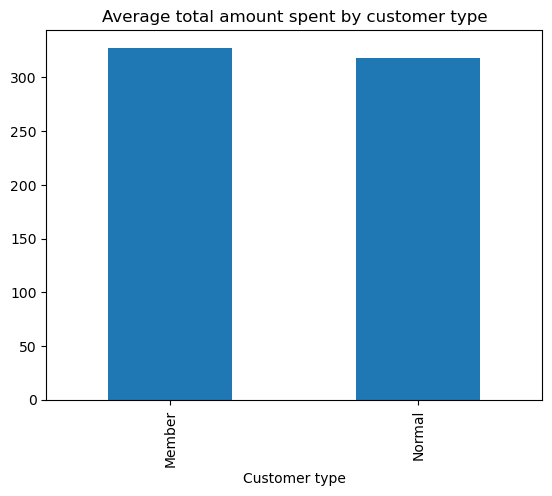

In [10]:
# visualize the df_customer_type
df_customer_type.plot(kind='bar', title ='Average total amount spent by customer type')

In [11]:
# group the data by Gender and calculate the average total amount spent by each type
df_Gender_type = df.groupby('Gender')['Total'].mean()
print(df_Gender_type)

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Average total amount spent by Gender type'}, xlabel='Gender'>

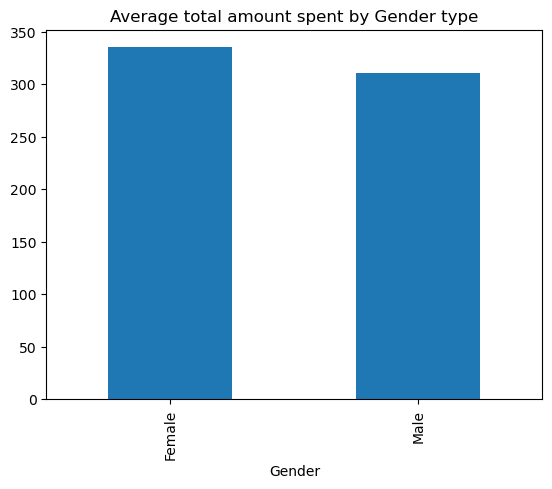

In [12]:
# visualize the df_Gender_type
df_Gender_type.plot(kind='bar', title ='Average total amount spent by Gender type')

<AxesSubplot:xlabel='Product line', ylabel='Total'>

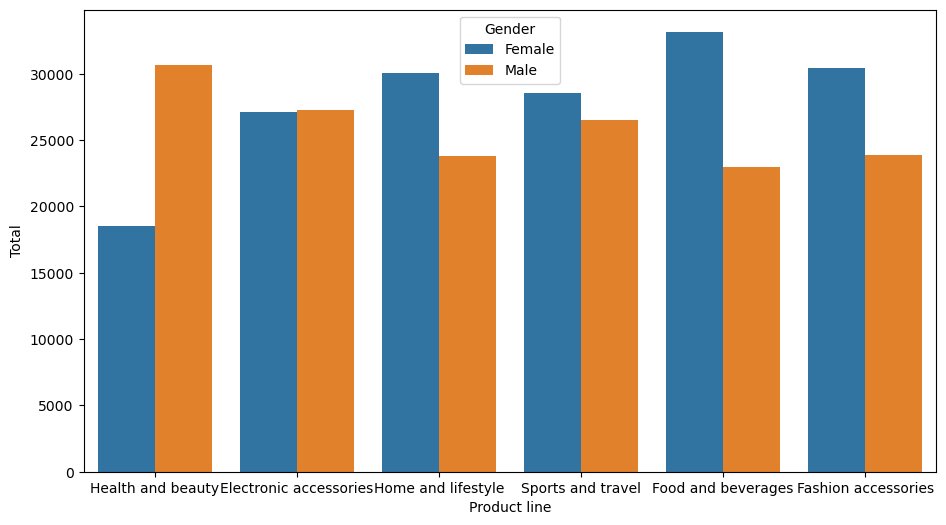

In [13]:
# let's visualize gender, product line vs total first
plt.figure(figsize=(11,6))
sns.barplot(x='Product line', y = 'Total', hue = 'Gender', data = df, estimator = sum, ci = None)

In [14]:
# group the data by gender and product line and calculate the total sales for each group
df_gender_product_line = df.groupby(['Gender', 'Product line'])['Total'].sum()
print(df_gender_product_line)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Total Sales for each group of gender and product line'}, xlabel='Gender,Product line'>

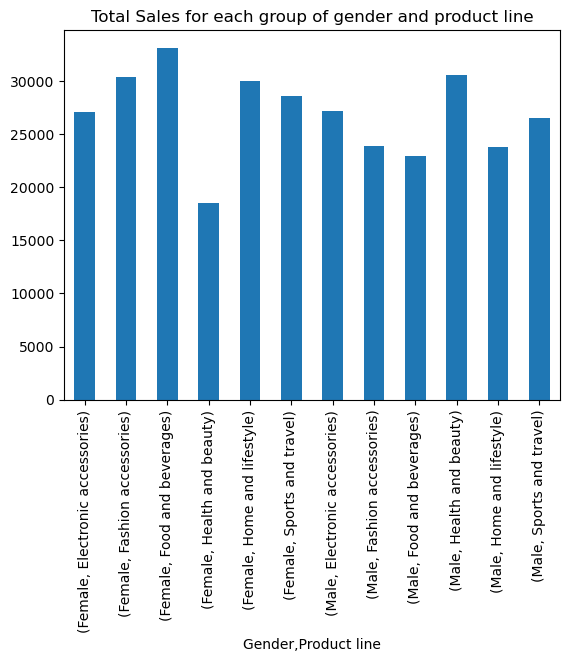

In [15]:
# visualize the total sales for each group of gender and product line
df_gender_product_line.plot(kind = 'bar', title = 'Total Sales for each group of gender and product line')

In [16]:
# calculate the average unit price for each product line
df_product_line_price = df.groupby('Product line')['Unit price'].mean()
print(df_product_line_price)

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


<AxesSubplot:title={'center':'Average Unit price for each Product Line'}, xlabel='Product line'>

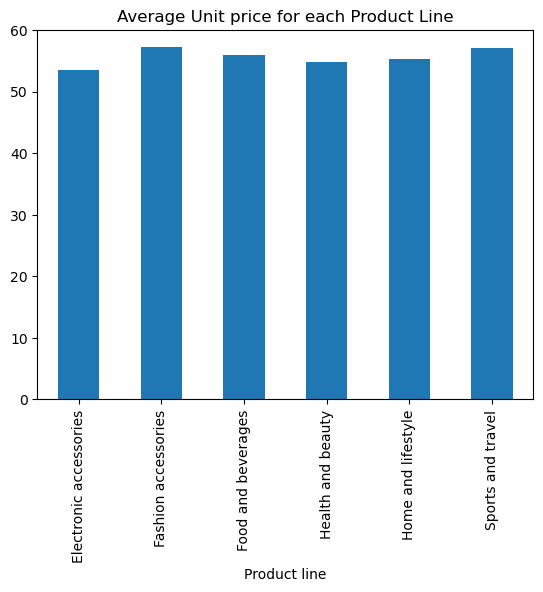

In [17]:
# visualize the average unit price for each product line
df_product_line_price.plot(kind='bar', title ='Average Unit price for each Product Line')

In [18]:
# calculate overall gross margin percentage
df['gross_margin']=(df['Total']-df['cogs'])/df['Total']
overall_gross_margin = df['gross_margin'].mean()
print(overall_gross_margin)

0.047619047619048616


A gross margin of 0.047 means that out of the total revenue, only 4.76% is left after accounting for the COGS. this indicates a low level of profitability for the supermarket. To improve the profitability, the business can try to reduce the COGS or increase revenue

In [19]:
# which cities are the biggest contributors to the overall sales
# calculate the total sales for each city
df_city_sales = df.groupby('City')['Total'].sum()
df_city_sales

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

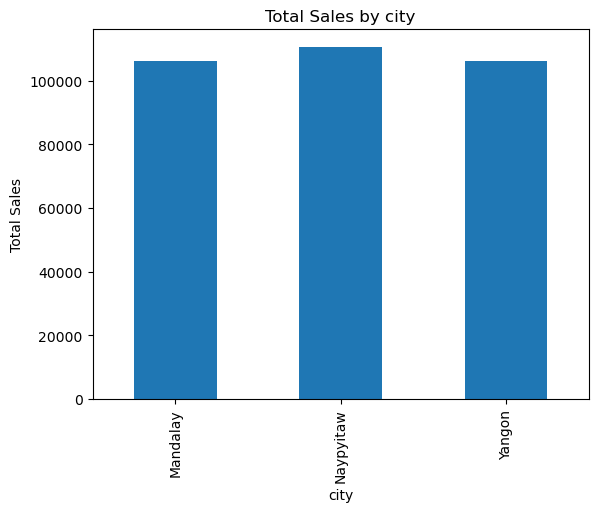

In [20]:
# create a bar chart to visualize the total sales for each city
df_city_sales.plot(kind='bar')
plt.title('Total Sales by city')
plt.xlabel('city')
plt.ylabel('Total Sales')
plt.show()

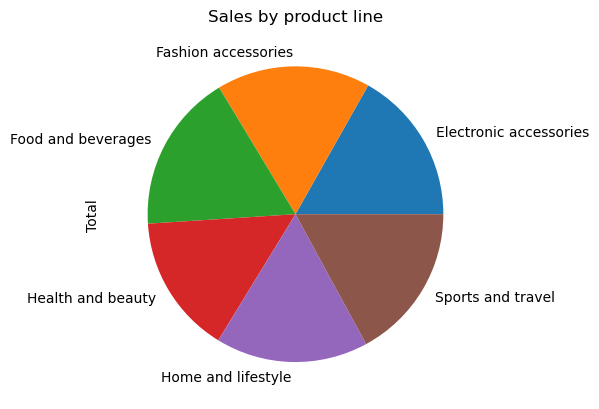

In [21]:
# create a pie chart to visualize the distribution of sales across different product lines
df.groupby('Product line')['Total'].sum().plot(kind='pie')
plt.title('Sales by product line')
plt.show()

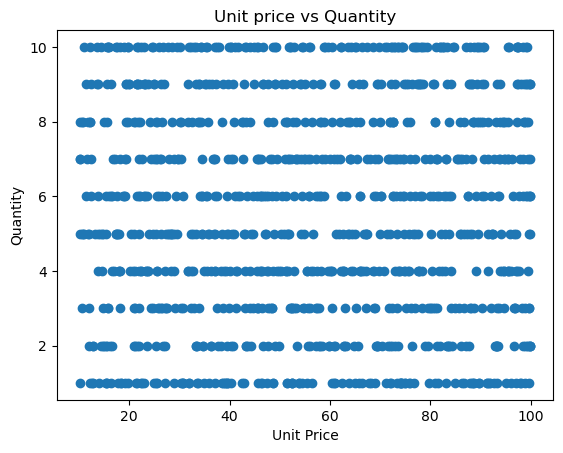

,Unit price,Quantity
Unit price,1.000000,0.010778
Quantity,0.010778,1.000000


In [22]:
# create a scatter plot to visualize the relation ship b/w unit price and quantity
plt.scatter(df['Unit price'], df['Quantity'])
plt.title('Unit price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()
df[['Unit price', 'Quantity']].corr()

We can see a correlation value of 0.010778 indicates a very weak positive correlation between the variables. this means that there is a very weak relationship between two variables and as one variable increases, the other variable also increases, but only slightly

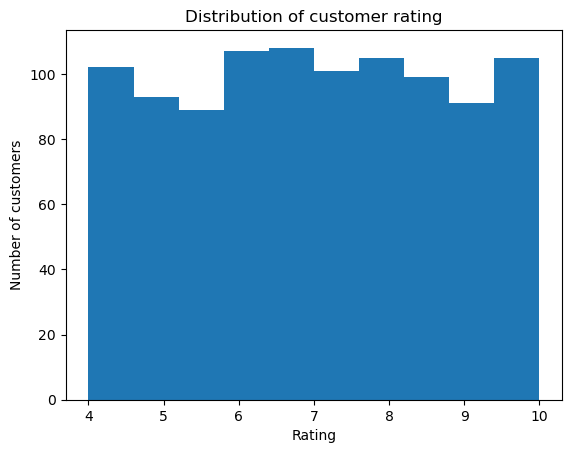

In [23]:
# crerate a histogram to visualize the distribution of customer ratings
df['Rating'].plot(kind='hist')
plt.title('Distribution of customer rating')
plt.xlabel('Rating')
plt.ylabel('Number of customers')
plt.show()

In [24]:
# this visualization isn't really telling us much. let's try to bin our dataset and lets see what happens
bins = np.linspace(min(df['Rating']), max(df['Rating']), 4)
group_names = ['Low', 'Medium', 'High']
df['rating-binned']= pd.cut(df['Rating'], bins, labels=group_names, include_lowest=True)
df[['Rating', 'rating-binned']].head(20)

,Rating,rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [25]:
# lets see the number of ratings in each bin
df['rating-binned'].value_counts()

Medium    351
Low       341
High      308
Name: rating-binned, dtype: int64

Text(0.5, 1.0, 'Distribution of customer rating bins')

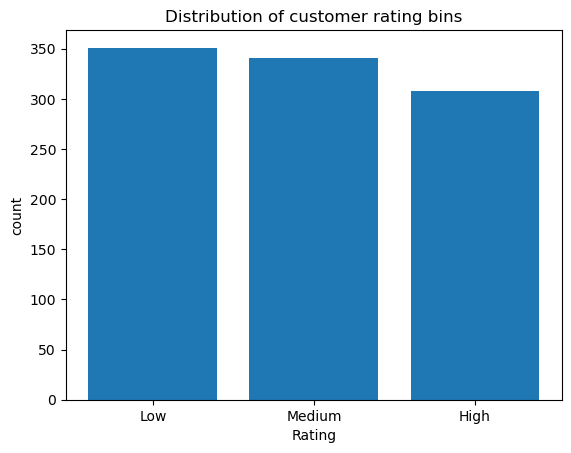

In [26]:
# let's plot the distribution of each bin
plt.bar(group_names, df['rating-binned'].value_counts())
plt.xlabel('Rating')
plt.ylabel('count')
plt.title('Distribution of customer rating bins')

Most popular product lines:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Most Popular Product Lines'}, xlabel='Product line'>

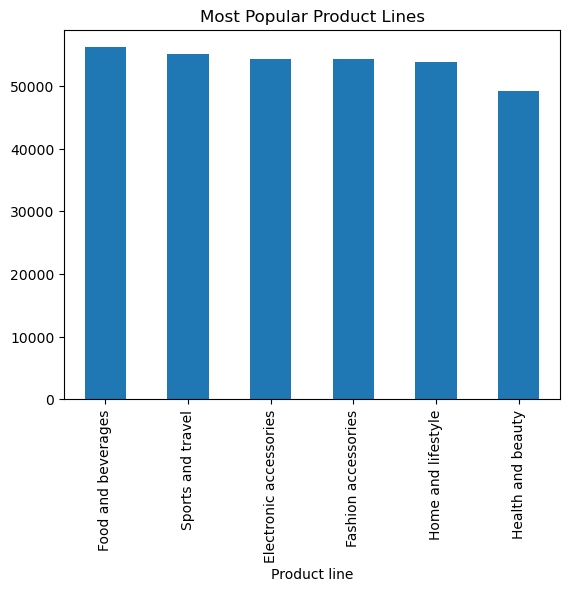

In [27]:
# group the data by product line and calculate the total sales for each product line
product_line_sales = df.groupby('Product line')['Total'].sum()

# sort the product lines by total sales in descending order
product_line_sales = product_line_sales.sort_values(ascending=False)

# print the most popular product lines
print('Most popular product lines:')
print(product_line_sales.head(10))

# visualize the most popular product lines
product_line_sales.head(10).plot(kind='bar', title = 'Most Popular Product Lines')

Most profitable product lines:
Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64


<AxesSubplot:title={'center':'Most Profitable Product Lines'}, xlabel='Product line'>

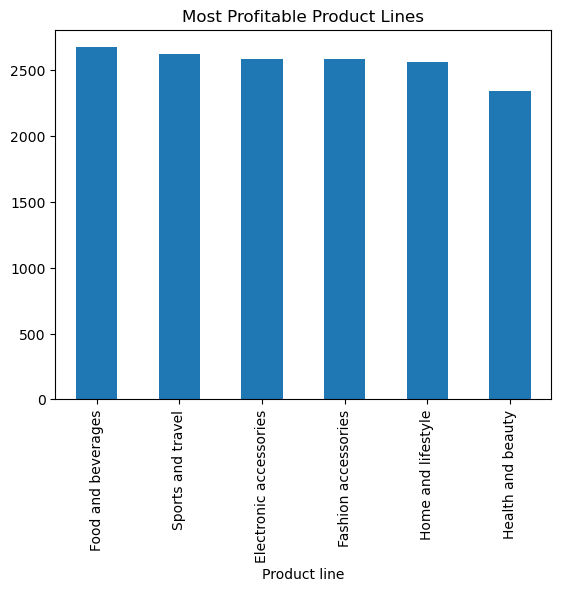

In [28]:
# group the data by product line and calculate the total gross income for each product line
product_line_income = df.groupby('Product line')['gross income'].sum()

# sort the product lines by total gross income in descending order
product_line_income = product_line_income.sort_values(ascending=False)

# print the top 10 most profitable product lines
print('Most profitable product lines:')
print(product_line_income.head(10))

# visualize the most profitable product lines
product_line_income.head(10).plot(kind='bar', title = 'Most Profitable Product Lines')

Most popular payment methods:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Most Popular Payment Methods'}, xlabel='Payment'>

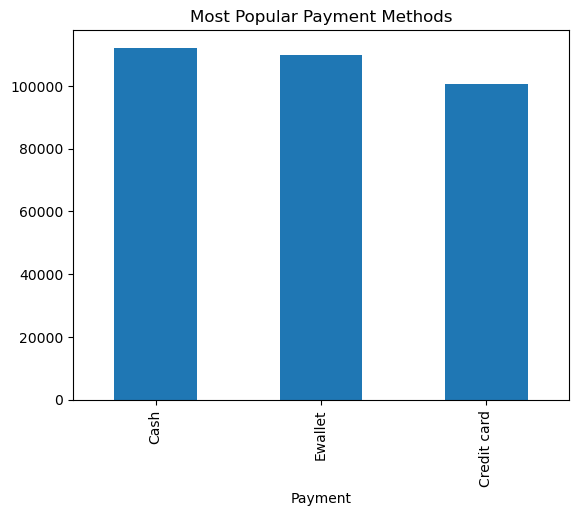

In [29]:

# group the data by payment method and calculate the total sales for each payment method
payment_method_sales = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method_sales = payment_method_sales.sort_values(ascending=False)

# print the most popular payment methods
print('Most popular payment methods:')
print(payment_method_sales.head(10))

# visualize the most popular payment methods
payment_method_sales.head(10).plot(kind='bar', title = 'Most Popular Payment Methods')

<AxesSubplot:xlabel='Payment', ylabel='Total'>

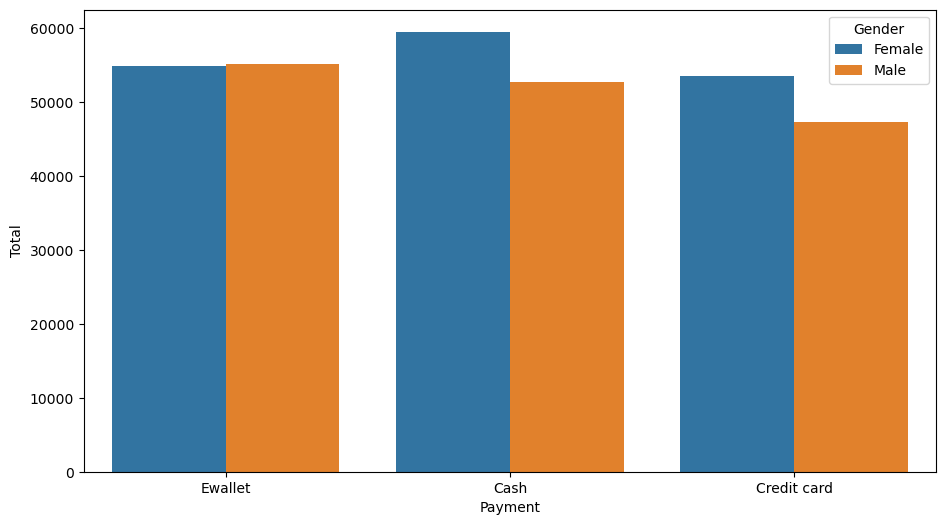

In [30]:
# total sales for each gender by payment method

plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Gender', data = df, ci = None, estimator = sum)

<AxesSubplot:xlabel='Payment', ylabel='Total'>

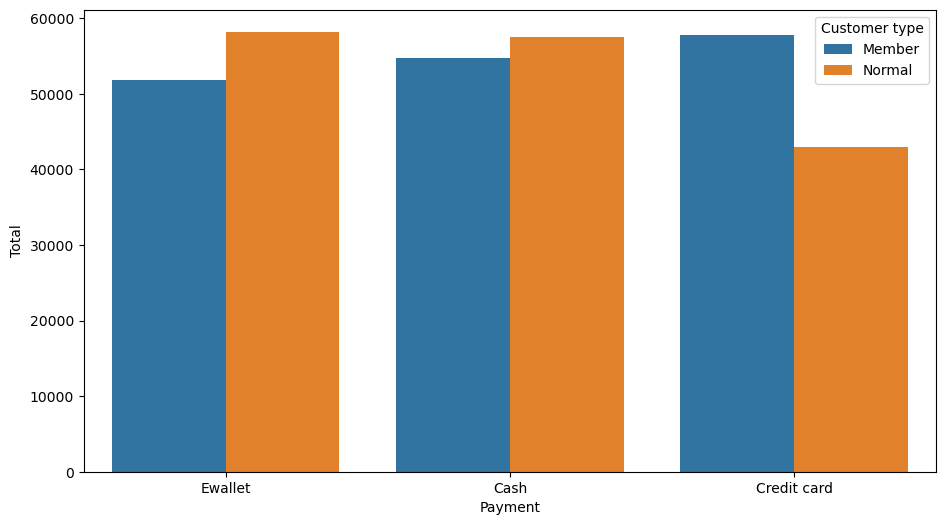

In [31]:
# total sales for each customer type by payment method

plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Customer type', data = df, ci = None, estimator = sum)

Average unit prices and quantities for each product line:
                        Unit price  Quantity
Product line                                
Electronic accessories   53.551588  5.711765
Fashion accessories      57.153652  5.067416
Food and beverages       56.008851  5.471264
Health and beauty        54.854474  5.618421
Home and lifestyle       55.316937  5.693750
Sports and travel        56.993253  5.542169


C:\Users\DELL\AppData\Local\Temp\ipykernel_11964\1032266833.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_line_data = df.groupby('Product line')['Unit price', 'Quantity'].mean()


<AxesSubplot:title={'center':'Average Unit Price and Quantities Per Product Line'}, xlabel='Product line'>

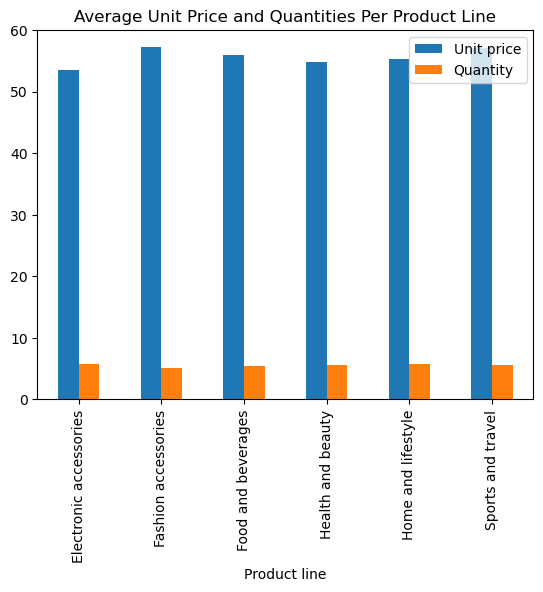

In [32]:
# group the data by product line and calculate the average unit price and quantity for each product line
product_line_data = df.groupby('Product line')['Unit price', 'Quantity'].mean()

# print the average unit prices and quantities for each product line
print('Average unit prices and quantities for each product line:')
print(product_line_data)

# visualize the average unit price and quantities for each product line
product_line_data.head(10).plot(kind='bar', title = 'Average Unit Price and Quantities Per Product Line')

<AxesSubplot:title={'center':'Average Unit Price Per Product Line'}, xlabel='Product line'>

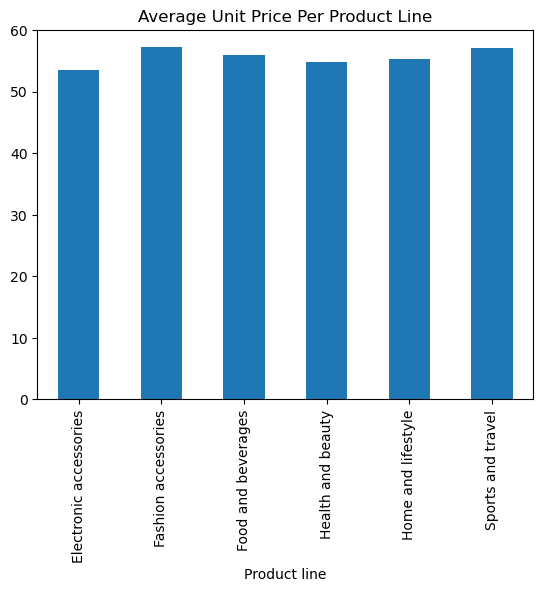

In [33]:
# visualize the average unit prices for each product line
product_line_data['Unit price'].plot(kind='bar', title = 'Average Unit Price Per Product Line')

<AxesSubplot:title={'center':'Average Quantities Per Product Line'}, xlabel='Product line'>

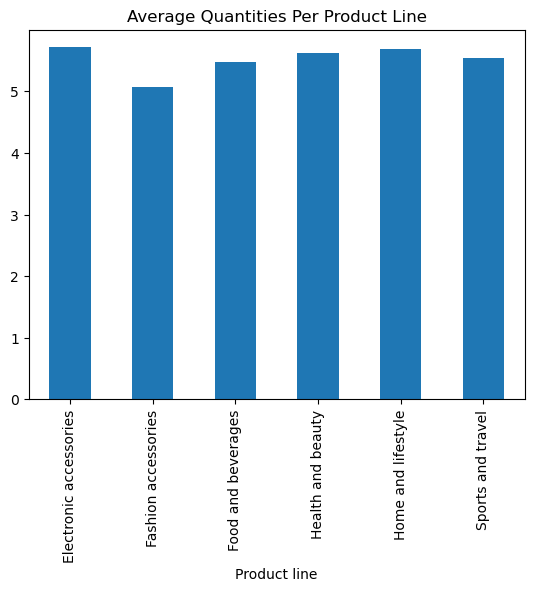

In [34]:
# visualize the average quantities for each product line
product_line_data['Quantity'].plot(kind='bar', title = 'Average Quantities Per Product Line')

Average gross margins and gross incomes for each product line:
                        gross margin percentage  gross income
Product line                                                 
Electronic accessories                 4.761905     15.220597
Fashion accessories                    4.761905     14.528062
Food and beverages                     4.761905     15.365310
Health and beauty                      4.761905     15.411572
Home and lifestyle                     4.761905     16.030331
Sports and travel                      4.761905     15.812630


C:\Users\DELL\AppData\Local\Temp\ipykernel_11964\3124358046.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_line_dataa = df.groupby('Product line')['gross margin percentage', 'gross income'].mean()


<AxesSubplot:title={'center':'Average Gross Margins and Gross Incomes Per Product Line'}, xlabel='Product line'>

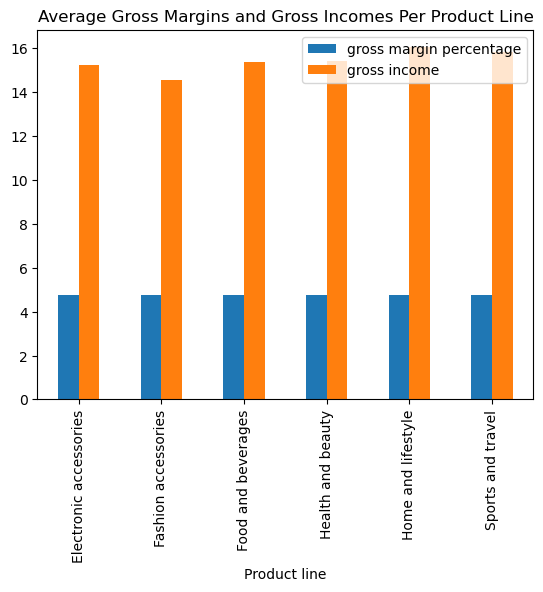

In [35]:
# group the data by product line and calculate the average gross margin and gross income for each product line
product_line_dataa = df.groupby('Product line')['gross margin percentage', 'gross income'].mean()

# print the average gross margins and gross incomes for each product line
print('Average gross margins and gross incomes for each product line:')
print(product_line_dataa)

# visualize the average gross margins and gross incomes for each product line
product_line_dataa.head(10).plot(kind='bar', title = 'Average Gross Margins and Gross Incomes Per Product Line')

Average customer ratings for each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Average Customer Ratings Per Product Line'}, xlabel='Product line'>

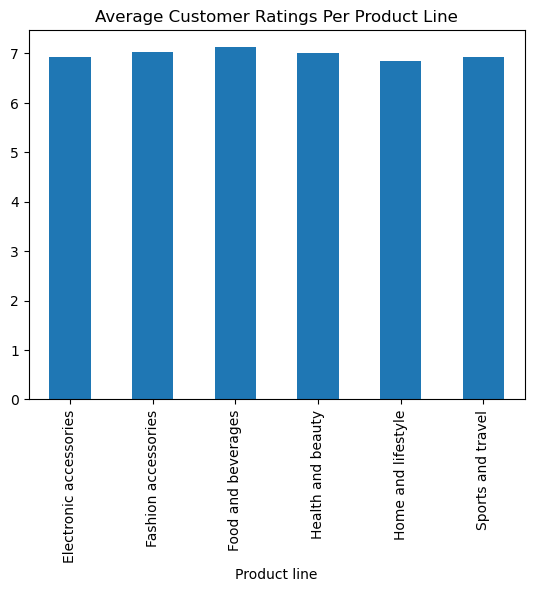

In [36]:
# group the data by product line and calculate the average customer rating for each product line
product_line_datta = df.groupby('Product line')['Rating'].mean()

# print the average customer ratings for each product line
print('Average customer ratings for each product line:')
print(product_line_datta)

# visualize the average customer ratings for each product line
product_line_datta.head(10).plot(kind='bar', title = 'Average Customer Ratings Per Product Line')

Most popular branches:
              Total              Rating          
                sum        mean     sum      mean
Branch                                           
C       110568.7065  337.099715  2319.9  7.072866
A       106200.3705  312.354031  2389.2  7.027059
B       106197.6720  319.872506  2263.6  6.818072


C:\Users\DELL\AppData\Local\Temp\ipykernel_11964\2992903684.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  branch_data = df.groupby('Branch')['Total', 'Rating'].agg(['sum', 'mean'])


<AxesSubplot:title={'center':'Most Popular Branch in Sales and Customer Ratings'}, xlabel='Branch'>

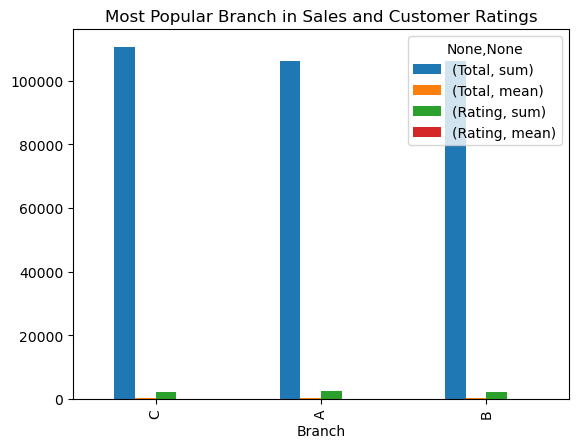

In [37]:
# group the data by branch and calculate the total sales and average customer rating for each branch
branch_data = df.groupby('Branch')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the branches by total sales in descending order
branch_data = branch_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular branches in terms of sales and customer ratings
print('Most popular branches:')
print(branch_data.head(10))

# visualize the most popular branches in terms of sales and customer ratings
branch_data.head(10).plot(kind='bar', title = 'Most Popular Branch in Sales and Customer Ratings')

Most popular cities:
                 Total              Rating          
                   sum        mean     sum      mean
City                                                
Naypyitaw  110568.7065  337.099715  2319.9  7.072866
Yangon     106200.3705  312.354031  2389.2  7.027059
Mandalay   106197.6720  319.872506  2263.6  6.818072


C:\Users\DELL\AppData\Local\Temp\ipykernel_11964\1875262399.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_data = df.groupby('City')['Total', 'Rating'].agg(['sum', 'mean'])


<AxesSubplot:title={'center':'Most Popular Cities in Sales and Customer Ratings'}, xlabel='City'>

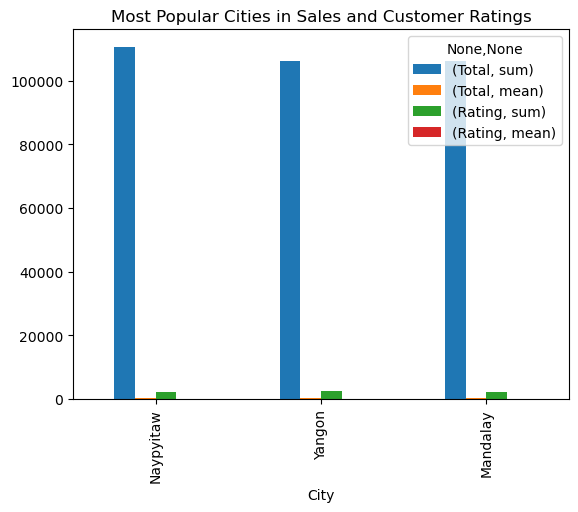

In [38]:
# group the data by city and calculate the total sales and average customer rating for each city
city_data = df.groupby('City')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the cities by total sales in descending order
city_data = city_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular cities in terms of sales and customer ratings
print('Most popular cities:')
print(city_data.head(10))

# visualize the most popular cities in terms of sales and customer ratings
city_data.head(10).plot(kind='bar', title = 'Most Popular Cities in Sales and Customer Ratings')

Top 10 groups with the highest average customer ratings:
Gender  Customer type  Payment      Product line          
Female  Member         Credit card  Electronic accessories    8.050000
Male    Normal         Credit card  Electronic accessories    7.925000
Female  Normal         Cash         Food and beverages        7.876923
Male    Member         Credit card  Electronic accessories    7.843750
                       Ewallet      Health and beauty         7.815385
Female  Normal         Cash         Health and beauty         7.738462
Male    Normal         Ewallet      Sports and travel         7.584211
Female  Member         Ewallet      Home and lifestyle        7.520000
                       Cash         Food and beverages        7.485000
        Normal         Cash         Fashion accessories       7.476471
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Top Groups With The Highest Average Customer Ratings'}, xlabel='Gender,Customer type,Payment,Product line'>

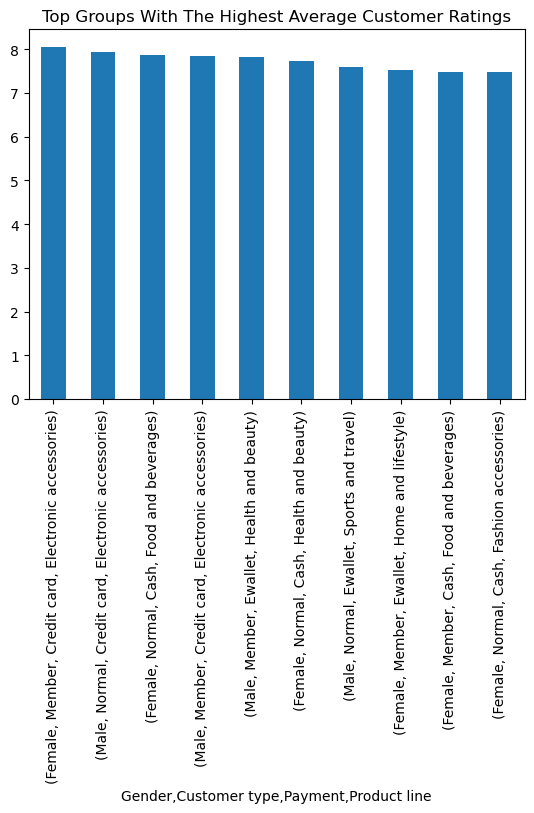

In [39]:
# group the data by gender, customer type, payment method, and product line and calculate the average customer rating for each group
customer_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Product line'])['Rating'].mean()

# sort the groups by average customer rating in descending order
customer_data = customer_data.sort_values(ascending=False)

# print the top 10 groups with the highest average customer ratings
print('Top 10 groups with the highest average customer ratings:')
print(customer_data.head(10))

# visualize the top 10 groups with the highest average customer ratings
customer_data.head(10).plot(kind='bar', title = 'Top Groups With The Highest Average Customer Ratings')

Top 10 groups with the lowest average customer ratings:
Gender  Customer type  Payment      Product line          
Male    Member         Cash         Home and lifestyle        6.073333
Female  Member         Ewallet      Food and beverages        6.100000
        Normal         Credit card  Home and lifestyle        6.133333
        Member         Ewallet      Sports and travel         6.181250
        Normal         Ewallet      Sports and travel         6.227273
        Member         Ewallet      Electronic accessories    6.250000
        Normal         Credit card  Electronic accessories    6.250000
Male    Member         Credit card  Home and lifestyle        6.300000
Female  Normal         Ewallet      Home and lifestyle        6.335714
                                    Health and beauty         6.392857
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Top Groups With The Lowest Average Customer Ratings'}, xlabel='Gender,Customer type,Payment,Product line'>

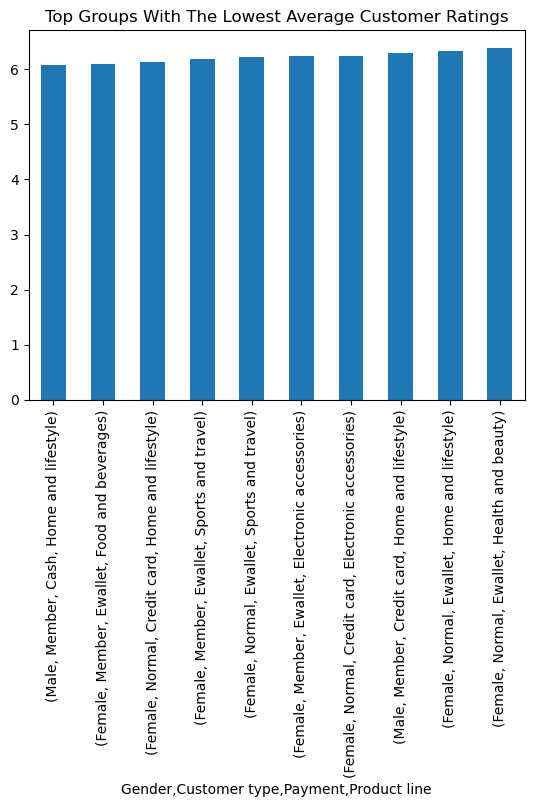

In [40]:
# group the data by gender, customer type, payment method, and product line and calculate the average customer rating for each group
customer_dataa = df.groupby(['Gender', 'Customer type', 'Payment', 'Product line'])['Rating'].mean()

# sort the groups by average customer rating in ascending order
customer_dataa = customer_data.sort_values()

# print the top 10 groups with the lowest average customer ratings
print('Top 10 groups with the lowest average customer ratings:')
print(customer_dataa.head(10))

# visualize the top groups with the lowest average customer ratings
customer_dataa.head(10).plot(kind='bar', title = 'Top Groups With The Lowest Average Customer Ratings')

Date
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Date'>

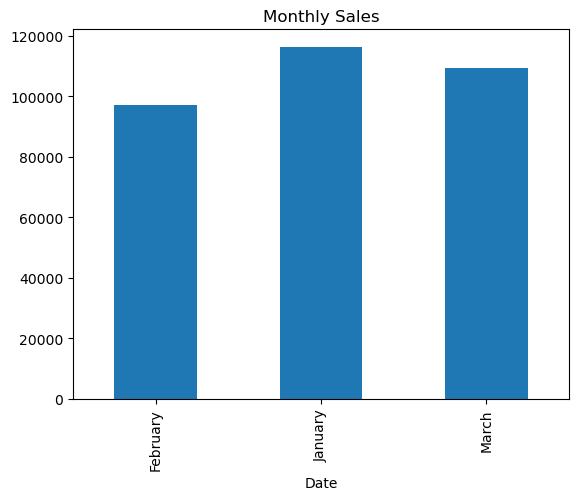

In [41]:
# calculate the total sales per month
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum()

print(monthly_sales)

# visualize the monthly sales
monthly_sales.plot(kind='bar', title = 'Monthly Sales')

Date
00    46
01    72
02    82
03    89
04    83
05    95
06    70
07    64
08    82
09    90
10    84
11    71
12    72
Name: Invoice ID, dtype: int64


<AxesSubplot:title={'center':'Transactions Per Week'}, xlabel='Date'>

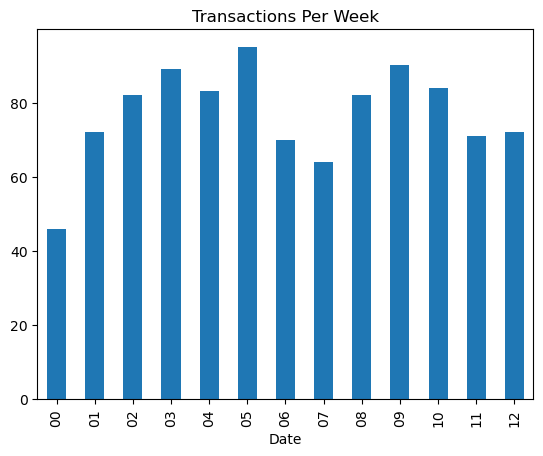

In [42]:
# calculate the total number of transactions per week
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_week = df.groupby(df['Date'].dt.strftime('%U'))['Invoice ID'].nunique()

# print the results
print(transactions_per_week)

# visualize the transactions per week
transactions_per_week.plot(kind='bar', title = 'Transactions Per Week')

Date
Fri    139
Mon    125
Sat    164
Sun    133
Thu    138
Tue    158
Wed    143
Name: Invoice ID, dtype: int64


<AxesSubplot:title={'center':'Transaction Per Day'}, xlabel='Date'>

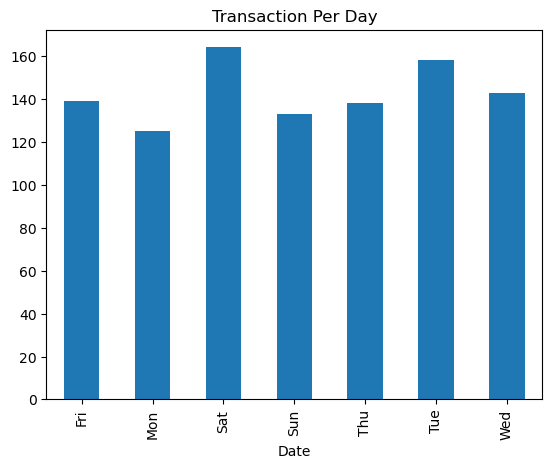

In [43]:
# calculate the total number of transactions per day
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_day = df.groupby(df['Date'].dt.strftime('%a'))['Invoice ID'].nunique()

# print the results
print(transactions_per_day)

# visualize the transactions per day
transactions_per_day.plot(kind='bar', title='Transaction Per Day')

Time
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64


<AxesSubplot:title={'center':'Transactions Per Hour'}, xlabel='Time'>

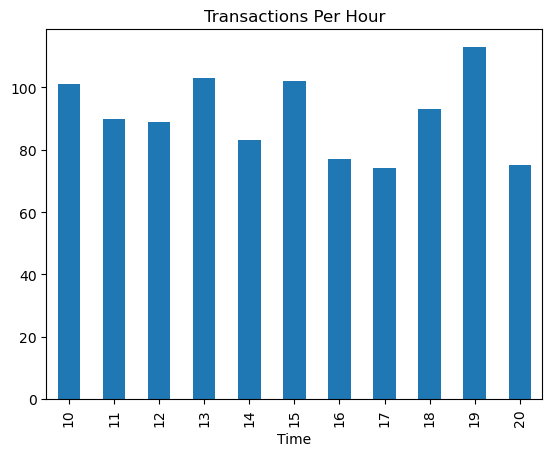

In [44]:
# calculate the total number of transactions per hour
df['Time'] = pd.to_datetime(df['Time'])
transactions_per_hour = df.groupby(df['Time'].dt.strftime('%H'))['Invoice ID'].nunique()

print(transactions_per_hour)

# visualize the transactions per hour
transactions_per_hour.plot(kind='bar', title = 'Transactions Per Hour')

In [45]:
# group the data by product line and day of the week and calculate the total quantity sold for each group
product_data = df.groupby(['Product line', df['Date'].dt.strftime('%a')])['Quantity'].sum()

# select the groups for weekends and weekdays
weekend_data = product_data.loc[:, ['Sat', 'Sun']]
weekday_data = product_data.loc[:, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']]

# sum the quantities for each product line on weekends and weekdays
weekend_data = weekend_data.groupby('Product line').sum()
weekday_data = weekday_data.groupby('Product line').sum()

# sort the data in descending order
weekend_data = weekend_data.sort_values(ascending=False)
weekday_data = weekday_data.sort_values(ascending=False)

Top products sold on weekdays:
Product line
Electronic accessories    678
Health and beauty         667
Food and beverages        662
Fashion accessories       620
Sports and travel         611
Home and lifestyle        575
Name: Quantity, dtype: int64


<AxesSubplot:title={'center':'Top Products Sold on Weekdays'}, xlabel='Product line'>

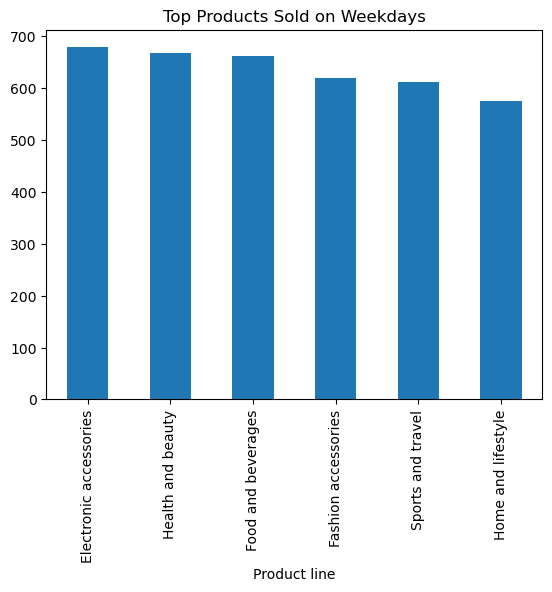

In [46]:
print('Top products sold on weekdays:')
print(weekday_data.head(10))

# visualize the top products sold on weekdays
weekday_data.head(10).plot(kind='bar', title = 'Top Products Sold on Weekdays')

Top products sold on weekends:
Product line
Home and lifestyle        336
Sports and travel         309
Electronic accessories    293
Food and beverages        290
Fashion accessories       282
Health and beauty         187
Name: Quantity, dtype: int64


<AxesSubplot:title={'center':'Top Products Sold on Weekends'}, xlabel='Product line'>

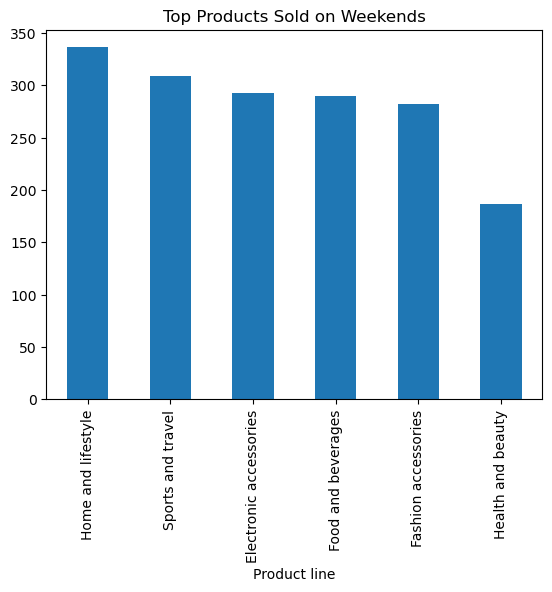

In [47]:
print('Top products sold on weekends:')
print(weekend_data.head(10))

# visualize the top products sold on weekends
weekend_data.head(10).plot(kind='bar', title = 'Top Products Sold on Weekends')

In [48]:
## let as remove the unwanted columns
df.drop(['Date', 'Time', 'Invoice ID'], axis =1, inplace=True)

In [49]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,gross_margin,rating-binned
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,0.047619,High
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,0.047619,High
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,0.047619,Medium
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,0.047619,High
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,0.047619,Low


In [50]:
df.shape

(1000, 16)

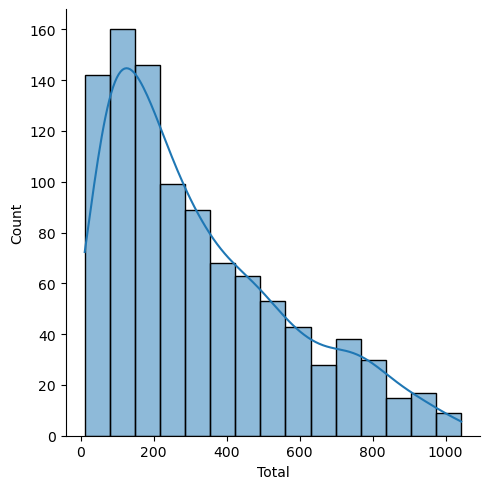

In [51]:
sns.displot(x='Total', kde = True, data=df)
plt.show()

In [52]:
df['log_total']=np.log(df['Total'])

In [53]:
df.shape

(1000, 17)

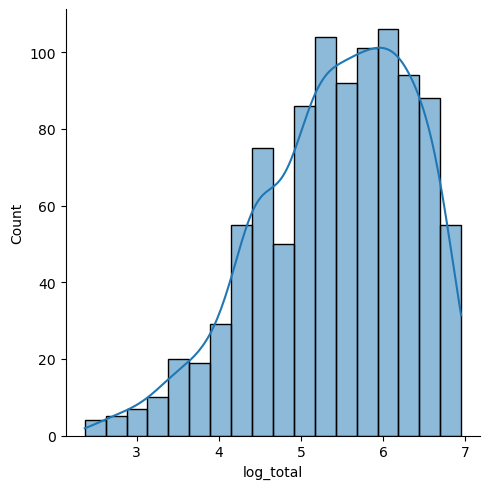

In [54]:
sns.displot(x='log_total', kde=True, data=df)
plt.show()

In [55]:
df1=pd.get_dummies(df, drop_first=True)
df1.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,gross_margin,log_total,...,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,rating-binned_Medium,rating-binned_High
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0.047619,6.308047,...,0,0,0,1,0,0,0,1,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0.047619,4.384773,...,0,0,0,0,0,0,0,0,0,1
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0.047619,5.830490,...,1,0,0,0,1,0,1,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0.047619,6.192461,...,1,0,0,1,0,0,0,1,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0.047619,6.452646,...,1,0,0,0,0,1,0,1,0,0


# Building the base model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [57]:
X = df1.drop(['Total', 'log_total'], axis=1)
y = df1[['Total', 'log_total']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y['log_total'], test_size = .20, random_state = 1)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
log_tr_pred = np.exp(lr.predict(X_train))
log_test_pred = np.exp(lr.predict(X_test))

In [62]:
log_tr_pred[:5]

array([ 531.12071488,   87.89538521, 1269.58533688,  250.77154144,
        448.00812295])

In [63]:
act_y_train = y.loc[y_train.index, 'Total']
act_y_test = y.loc[y_test.index, 'Total']

In [64]:
r2_score(log_tr_pred, act_y_train)

0.8955141428067578

In [66]:
print('Train R2 square:', round(r2_score(log_tr_pred, act_y_train)*100,2))
print('Train RMSE:',round(np.sqrt(mean_squared_error(log_tr_pred, act_y_train)), 2))

Train R2 square: 89.55
Train RMSE: 100.02


In [67]:
print('Test R2 square:', round(r2_score(log_test_pred, act_y_test)*100,2))
print('Test RMSE:',round(np.sqrt(mean_squared_error(log_test_pred, act_y_test)), 2))

Test R2 square: 91.38
Test RMSE: 82.61


# heat map to check multicollinearity

In [68]:
mask = np.triu(np.ones(X.corr().shape))

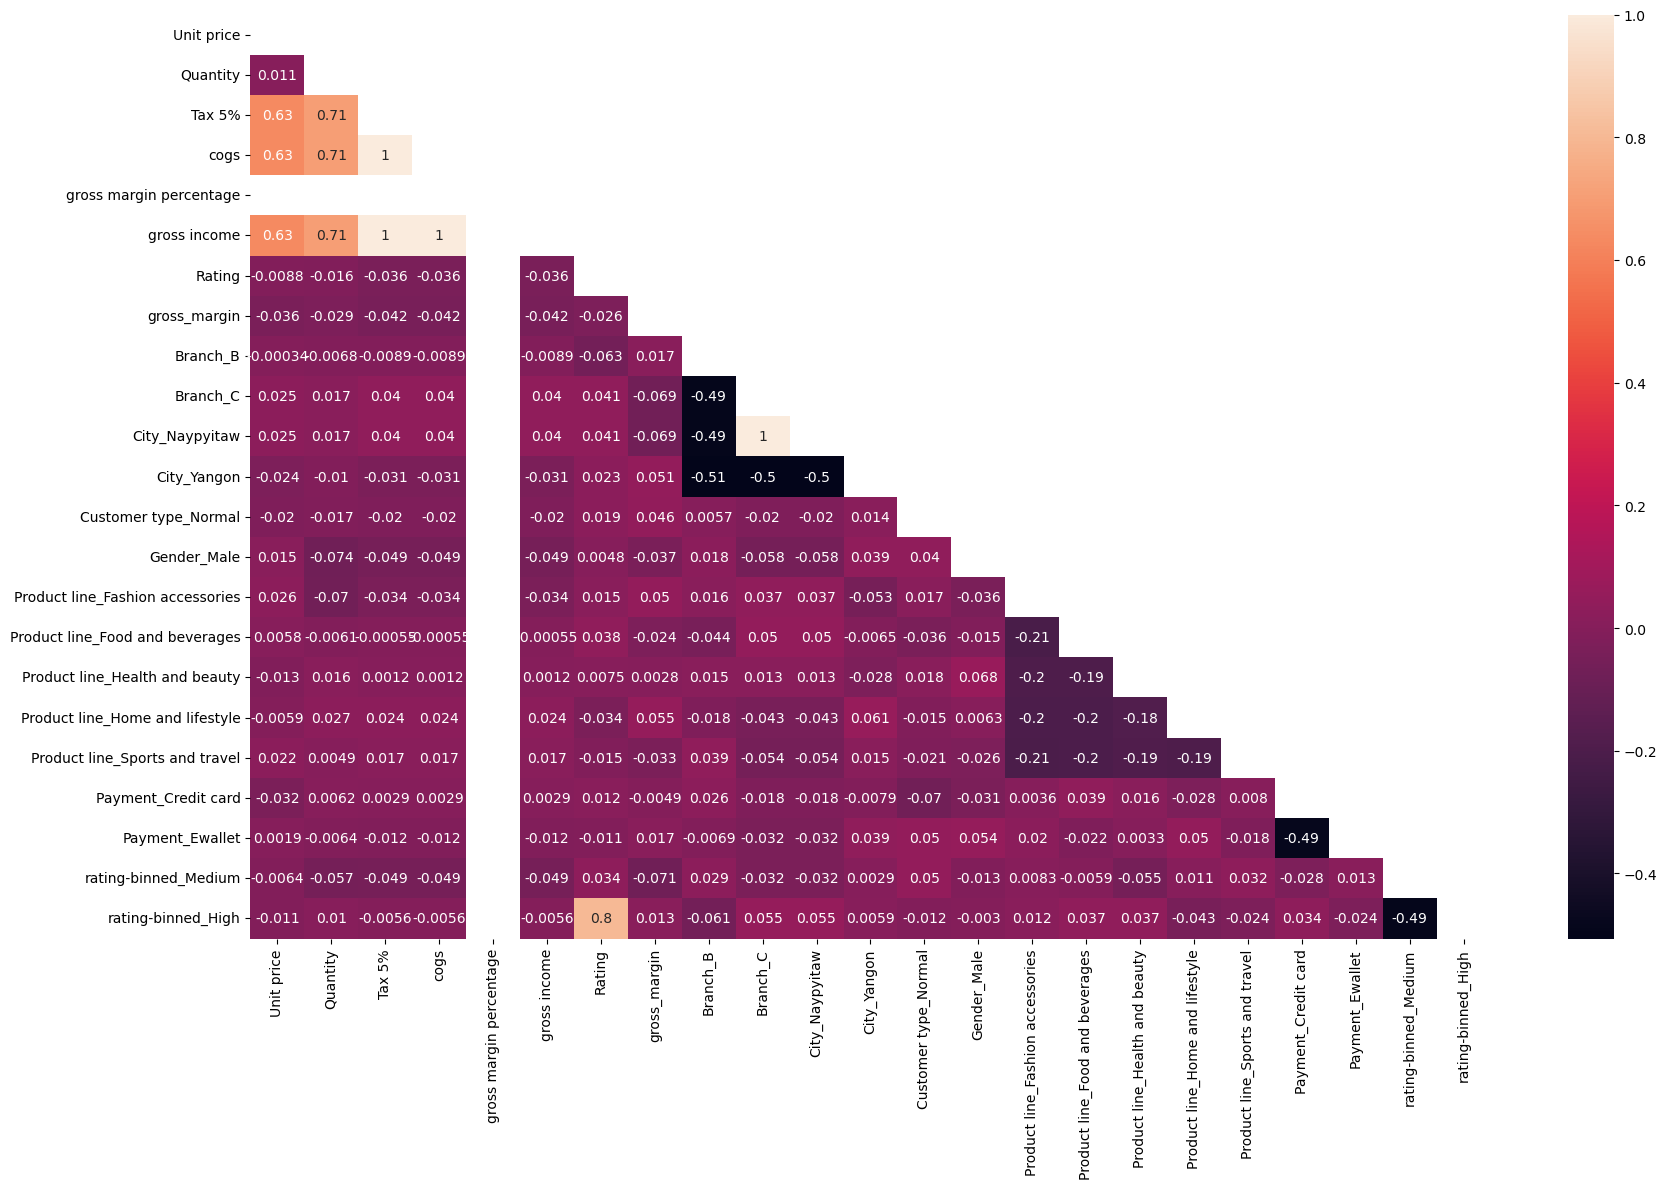

In [69]:
plt.figure(figsize=(20,12))
sns.heatmap(X.corr(), mask=mask, annot=True)
plt.show()

From the above heat map, we can identify that some multicollinearity exists in the data. let us VIF to eliminate the multicollinear columns.

# Variance Inflation Factor

In [70]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data= pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]
print(vif_data)

                             feature        VIF
0                         Unit price   4.649146
1                           Quantity   5.525539
2                             Tax 5%        inf
3                               cogs        inf
4            gross margin percentage   0.000000
5                       gross income        inf
6                             Rating   8.750858
7                       gross_margin   0.017990
8                           Branch_B        inf
9                           Branch_C        inf
10                    City_Naypyitaw        inf
11                       City_Yangon        inf
12              Customer type_Normal   1.013948
13                       Gender_Male   1.022339
14  Product line_Fashion accessories   1.705615
15   Product line_Food and beverages   1.688523
16    Product line_Health and beauty   1.619673
17   Product line_Home and lifestyle   1.643741
18    Product line_Sports and travel   1.660531
19               Payment_Credit card   1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


From the above we have not found any highest VIF

In [71]:
df1.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,gross_margin,log_total,...,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,rating-binned_Medium,rating-binned_High
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0.047619,6.308047,...,0,0,0,1,0,0,0,1,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0.047619,4.384773,...,0,0,0,0,0,0,0,0,0,1
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0.047619,5.830490,...,1,0,0,0,1,0,1,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0.047619,6.192461,...,1,0,0,1,0,0,0,1,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0.047619,6.452646,...,1,0,0,0,0,1,0,1,0,0


In [72]:
dfw = df1['Tax 5%']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [73]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

166    47.790
167    49.490
350    49.650
357    47.720
422    48.605
557    49.260
699    48.750
792    48.685
996    48.690
Name: Tax 5%, dtype: float64

In [74]:
df1.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,gross_margin,log_total,...,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,rating-binned_Medium,rating-binned_High
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0.047619,6.308047,...,0,0,0,1,0,0,0,1,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0.047619,4.384773,...,0,0,0,0,0,0,0,0,0,1
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0.047619,5.830490,...,1,0,0,0,1,0,1,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0.047619,6.192461,...,1,0,0,1,0,0,0,1,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0.047619,6.452646,...,1,0,0,0,0,1,0,1,0,0


In [75]:
## Let us scale the data before building the model
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

In [76]:
X_Scaled = scale.fit_transform(X)

In [77]:
X_Scaled_df = pd.DataFrame(X_Scaled, columns = X.columns)

In [78]:
X_Scaled_df.head()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating,gross_margin,Branch_B,Branch_C,...,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,rating-binned_Medium,rating-binned_High
0,0.718847,0.666667,0.521616,0.521616,0.0,0.521616,0.850000,1.040834e-16,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.057855,0.444444,0.067387,0.067387,0.0,0.067387,0.933333,1.040834e-16,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.403316,0.666667,0.319628,0.319628,0.0,0.319628,0.566667,2.428613e-16,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.535603,0.777778,0.463549,0.463549,0.0,0.463549,0.733333,2.151057e-16,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.848131,0.666667,0.604377,0.604377,0.0,0.604377,0.216667,2.983724e-16,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [79]:
X_Scaled_df.shape

(1000, 23)

# Building the model

We are building the model now with non-multicollinearity scaled dataset.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled_df, y['log_total'], test_size=0.2, random_state=1)

In [81]:
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
tr_scaled_pred = np.exp(lr.predict(X_train))
test_scaled_pred = np.exp(lr.predict(X_test))

In [83]:
act_y_train = y.loc[y_train.index, 'Total']
act_y_test = y.loc[y_test.index, 'Total']

In [84]:
print("Train Scaled R2 Score: ", round(r2_score(tr_scaled_pred, act_y_train)*100,2))
print("Train Scaled RMSE :", round(np.sqrt(mean_squared_error(tr_scaled_pred, act_y_train)),2))

Train Scaled R2 Score:  89.27
Train Scaled RMSE : 102.16


In [85]:
print("Test Scaled R2 Score: ", round(r2_score(test_scaled_pred, act_y_test)*100,2))
print("Test Scaled RMSE :", round(np.sqrt(mean_squared_error(test_scaled_pred, act_y_test)),2))

Test Scaled R2 Score:  91.24
Test Scaled RMSE : 83.68


# Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(oob_score = True, min_samples_leaf = 75, n_estimators=100)

In [88]:
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=75, oob_score=True)

In [89]:
print("OOB_Score : ", rf.oob_score_)

OOB_Score :  0.9392205442049884


In [90]:
rf_tr_pred = np.exp(rf.predict(X_train))
rf_test_pred = np.exp(rf.predict(X_test))

In [91]:
print("Train RF R2 Score: ", round(r2_score(rf_tr_pred, act_y_train)*100,2))
print("Train RF RMSE :", round(np.sqrt(mean_squared_error(rf_tr_pred, act_y_train)),2))

Train RF R2 Score:  93.05
Train RF RMSE : 59.91


In [92]:
print("Test RF R2 Score: ", round(r2_score(rf_test_pred, act_y_test)*100,2))
print("Test RF RMSE :", round(np.sqrt(mean_squared_error(rf_test_pred, act_y_test)),2))

Test RF R2 Score:  95.98
Test RF RMSE : 45.08


In [93]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 75,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
#standardized data 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

In [95]:
# Building the model
from sklearn.linear_model import SGDRegressor

In [96]:
sgdr = SGDRegressor()
sgdr.fit(xtrain, y_train)

SGDRegressor()

In [97]:
score = sgdr.score(xtrain, y_train)

In [98]:
print("R-Squared", score)

R-Squared 0.9068298086613062


In [99]:
#prediction 
y_pred = sgdr.predict(xtest)

In [100]:
mse = mean_squared_error(y_test, y_pred)
print('MSE', mse)

MSE 0.0858268945523471


In [101]:
print('RMSE', np.sqrt(mse))

RMSE 0.2929622749644519


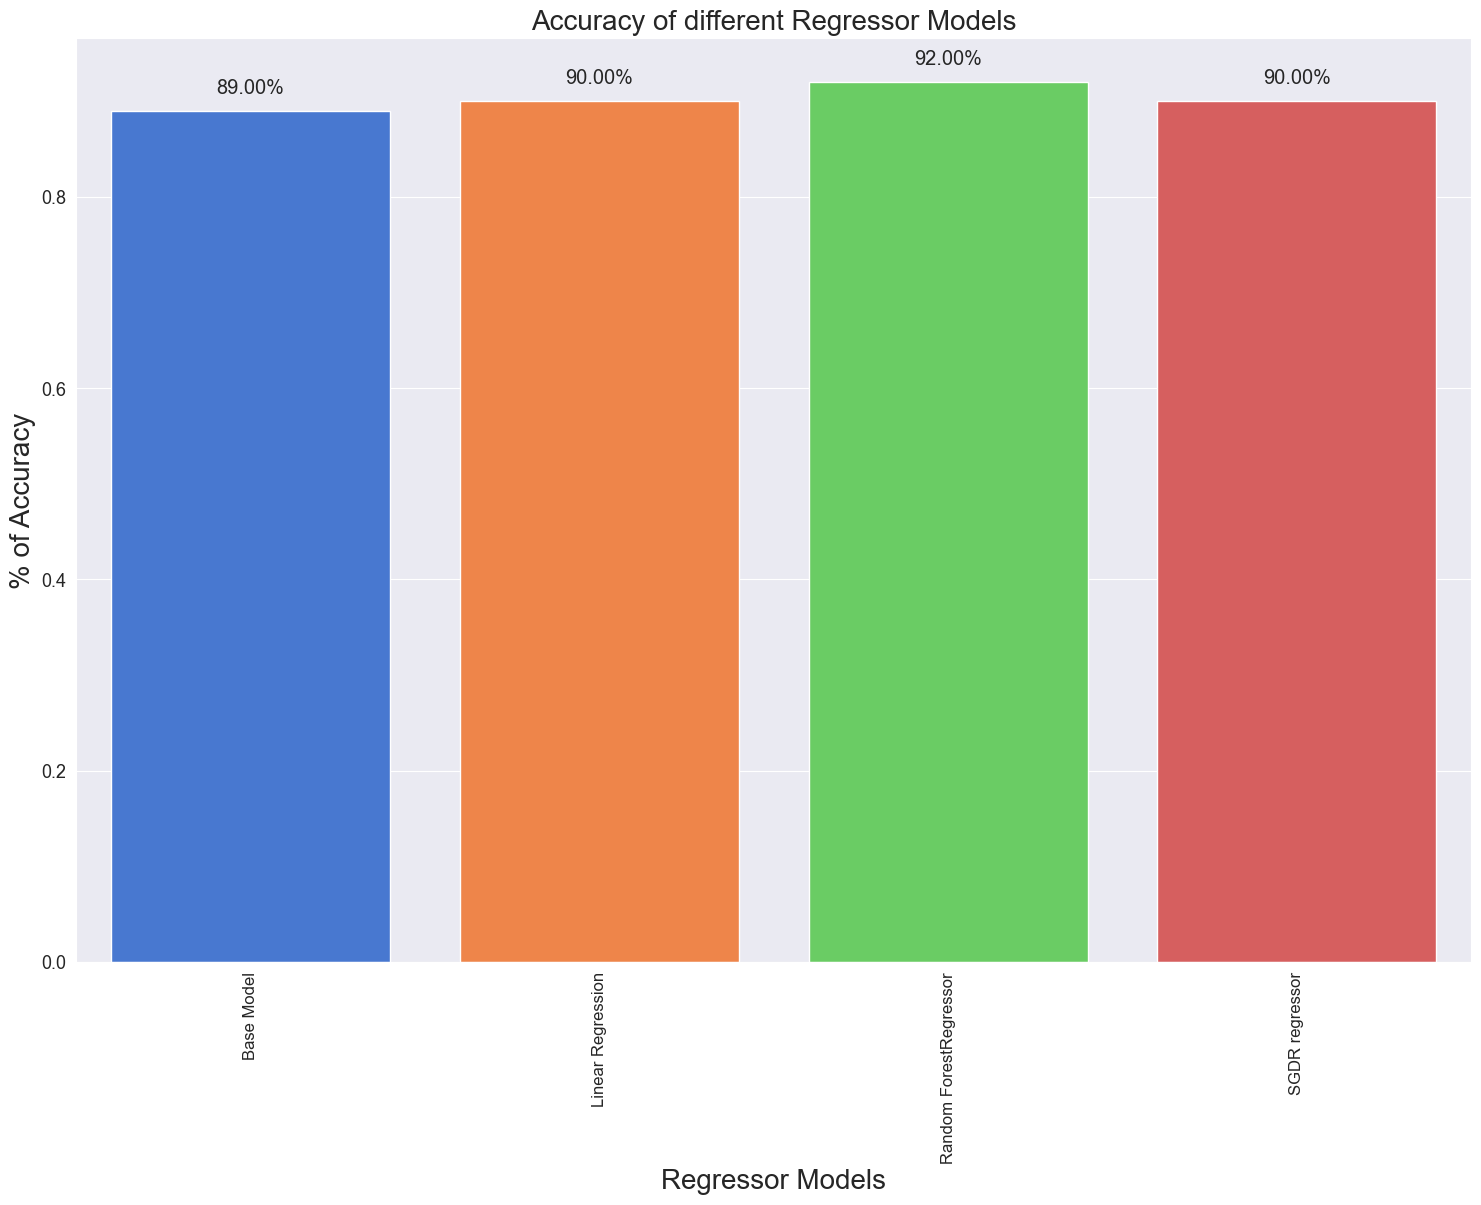

In [102]:
"""# Plotting the Accuracy of different models"""

''' Plotting the Accuracy of different models '''

list_acc = [0.89,0.90, 0.92, 0.90]
list1 = ["Base Model","Linear Regression","Random ForestRegressor", 'SGDR regressor']
plt.rcParams['figure.figsize']=18,12
sns.set_style("darkgrid")
ax = sns.barplot(x=list1, y=list_acc, palette = "muted", saturation =1.5)
plt.xlabel("Regressor Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Regressor Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()